# Catering Market Analysis

# Table of contents

I. General information. Interim conclusions.

II. Data preprocessing.
- Changing the data type.
- Categorical data processing
- Duplicates processing
- Numeric data processing        
  Interim conclusions.

III. Dataframe editing (calculated fields).


IV. Exploratory Data Analysis (EDA).   
- Types of the catering facilities.     
  Interim conclusions.       
- Chain and "no-chain" catering facilities.      
  Interim conclusions.      
- Geographical characteristic of the catering facilities.     
  Interim conclusions.    
    
V. General conclusion.

# General Information 

In [27]:
# libraries import
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
from io import BytesIO
import requests

In [2]:
# pandas customization
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option("display.max_columns", 100)

In [3]:
# seaborn customization
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style='whitegrid', palette='dark')

Displaying tables with borders:

In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [5]:
# reading the file and saving it to the 'data' variable
pth1 = '/home/yuso/jupyter_dir/jupyter_env/datasets/food_data.csv'
pth2 = '/datasets/rest_data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [6]:
# primary data analysis function
def get_info(df):
    '''The function takes a dataframe as an input and provides general information about it: its shape (rows, columns),
    columns data type, number of non-null values (DataFrame.info()), first\last five rows (DataFrame.head()\tail()) and also a
    brief analysis for categorical and numerical data - DataFrame.describe().'''
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'Total number of rows: {df.shape[0]}, total number of columns: {df.shape[1]}.')
    print()
    print(df.info())
    display(df.head())
    display(df.tail())
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [7]:
# applying get_info function
get_info(data)

Total number of rows: 15366, total number of columns: 6.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,no,cafe,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,no,cafe,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,no,cafe,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,yes,cafe,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,no,cafe,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


,id,object_name,chain,object_type,address,number
15361,208537,Шоколадница,yes,cafe,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,yes,cafe,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,yes,cafe,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,yes,cafe,"город Москва, поселение Московский, Киевское ш...",36
15365,222535,Шоколадница,yes,cafe,"город Москва, Ходынский бульвар, дом 4",10


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
id,"15,366.00",NaN,NaN,NaN,"119,720.07","73,036.13",838.00,"27,187.00","95,067.00","144,974.50","160,145.00","192,097.00","223,439.00"
object_name,15366,10393,Столовая,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chain,15366,2,no,12398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
object_type,15366,9,cafe,6099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,15366,9108,"город Москва, Ходынский бульвар, дом 4",95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,"15,366.00",NaN,NaN,NaN,59.55,74.74,0.00,10.00,30.00,40.00,48.00,92.00,"1,700.00"


The dataframe has 6 columns (2 of them - int64, 4 - object type) and 15366 rows.   

**According to the documentation:**

- `id` - a unique number to every catering facility;
- `object_name` - the name of the catering facility;
- `chain` - contains 'yes' if the catering facility is a part of a chain and 'no' otherwise;
- `object_type` - contains the type of the catering facility;
- `address` - the address of the catering facility;
- `number` - says how many seats the catering facility has.     

**Brief data analysis:**

- there are no missing values in the data;
- `object_type` column contains 9 unique values, we'll find out if there are duplicates;
- data type issues: `chain` column has type object, bool (or categorization 0\1) is needed;
- the minimum value of the column `number` - 0 - we'll check the distribution, outliers, incorrect values;

## Interim conclusions

Each row of the table contains data about a catering facility - its unique ID, name, address, number of seats. All catering facilities are divided into two categories - chain and no-chain. Also there are nine types of catering facilities.

It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to check and remove duplicates, incorrect values, change the data type and remove outliers.

# Data preprocessing

## Changing the data type

In this section we'll make following data type changes:

* `chain` column - object to int64, `pandas.factorize` method;

In [8]:
# data type change in 'chain' column
data['chain'] = pd.factorize(data['chain'])[0]

In [9]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  int64 
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 720.4+ KB


## Categorical data processing

Before check for duplicates we'll transform text data to lowercase (str.lower() method).

Next we'll check unique values in the `object_type` column - `unique()` method. Also we'll count values in the `object_name` column - method `value_counts()`.

In [10]:
# columns required for transformation
obj_cols_list = data.select_dtypes(include='object').columns.tolist()

In [11]:
# transformation text data to lowercase 
data = data.apply(lambda x: x.str.lower() if x.name in obj_cols_list else x)
data = data.apply(lambda x: x.str.replace('ё','е') if x.name in obj_cols_list else x)

In [12]:
# 'object_type' unique values
data['object_type'].unique()

array(['cafe', 'canteen', 'diner', 'fast-food', 'restaurant', 'cafeteria',
       'buffet', 'bar', 'deli'], dtype=object)

In [13]:
# object_name value counts
data['object_name'].value_counts().head(10)

столовая           321
кафе               278
шаурма             250
шоколадница        158
kfc                155
макдоналдс         151
бургер кинг        137
теремок             94
крошка картошка     90
домино'с пицца      90
Name: object_name, dtype: int64

In [14]:
# check duplicated object name
data.query('object_name == "столовая"', engine='python').sample(10, random_state=666)

,id,object_name,chain,object_type,address,number
8571,78205,столовая,0,canteen,"город москва, поселение ""мосрентген"", поселок ...",96
4874,27713,столовая,0,canteen,"город москва, улица ибрагимова, дом 31, корпус 1",45
11185,187059,столовая,0,canteen,"город москва, щелковское шоссе, дом 5, строение 1",70
4900,129690,столовая,0,canteen,"город москва, кронштадтский бульвар, дом 7а",20
5436,68126,столовая,0,canteen,"город москва, илимская улица, дом 5, корпус 2",72
11472,181836,столовая,0,canteen,"город москва, улица подольских курсантов, дом ...",76
11271,189348,столовая,0,canteen,"город москва, южнопортовая улица, дом 22а",20
8834,146331,столовая,0,canteen,"улица ленинская слобода, дом 26, строение 5",160
61,21214,столовая,0,canteen,"город москва, бабаевская улица, дом 3",90
14135,210081,столовая,0,canteen,"город москва, улица декабристов, владение 51, ...",60


These catering facilities are not duplicates - they're located in different addresses. According to information from the Internet, some of these catering facilities have a permit system (for example, located in factories). For some objects, the full name is not given, for example, 'canteen' instead of 'canteen "Buffet"'.

## Duplicates processing

In [15]:
# duplicates check
data.duplicated().sum()

0

Let's check for duplicates `id` column (each catering facility should have a unique ID number).

In [16]:
# duplicates check in `id` column
data['id'].duplicated().sum()

0

## Numerical data processing

In this section we'll evaluate the number of seats distribution. Also we'll check outliers and incorrect values in this column.

In [17]:
# 'number' column info
data['number'].describe().to_frame()

,number
count,"15,366.00"
mean,59.55
std,74.74
min,0.00
25%,12.00
50%,40.00
75%,80.00
max,"1,700.00"


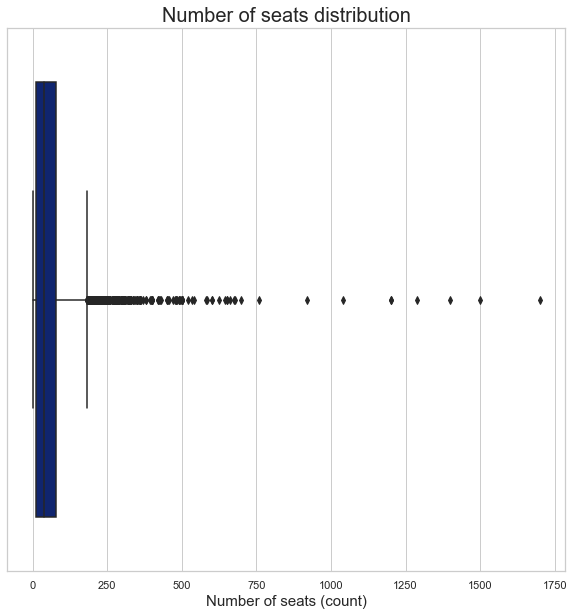

In [18]:
# boxplot
sns.boxplot(x=data['number'])
plt.title('Number of seats distribution', fontsize=20)
plt.xlabel('Number of seats (count)', fontsize=15);

In [19]:
# analyzing catering facilities with 0 seating number
data.query('number == 0', engine='python').sample(10, random_state=666)

,id,object_name,chain,object_type,address,number
12806,193966,выпечка,0,deli,"город москва, открытое шоссе, дом 9, строение 6",0
8752,154530,гриль хаус,0,fast-food,"город москва, хорошевское шоссе, дом 27",0
14843,219509,sushi-make,0,fast-food,"город москва, ярцевская улица, дом 19",0
9076,162735,донеретт пекарня,0,fast-food,"город москва, бакинская улица, дом 17",0
12482,203877,суши love,0,fast-food,"город москва, соколово-мещерская улица, дом 25",0
13737,223333,шаурмастер,0,fast-food,"город москва, площадь тверская застава, дом 3",0
12489,195899,пекарня «четыре пекаря»,0,diner,"город москва, михневская улица, дом 8",0
13830,220945,да еда. шаурма,0,cafe,"город москва, улица покровка, дом 17, строение 1",0
9809,170195,кафе «бистро»,0,fast-food,"город москва, улица академика варги, дом 26б",0
13619,206093,кебаб,0,fast-food,"город москва, улица пришвина, дом 13",0


In [20]:
# analyzing catering facilities with large seating number
data.query('number >= 750', engine='python')

,id,object_name,chain,object_type,address,number
2313,26560,ресторан «альфа»,0,restaurant,"город москва, измайловское шоссе, дом 71, корп...",1040
3686,27026,рум сервис,0,restaurant,"город москва, площадь европы, дом 2",1200
4480,27024,рум сервис,0,restaurant,"город москва, кутузовский проспект, дом 2/1, с...",1200
5649,29232,столовая московский гуманитарный университет,0,canteen,"город москва, улица юности, дом 5, строение 1",760
8148,80291,банкетный зал шелк,0,restaurant,"город москва, большой саввинский переулок, дом...",1500
8345,27750,столовая-буфет,0,canteen,"город москва, улица волхонка, дом 15",1400
9064,19719,комбинат питания «управление академсервис»,0,canteen,"город москва, проспект вернадского, дом 84, ст...",1288
9955,171116,eataly,0,restaurant,"город москва, киевская улица, дом 2",920
12723,199696,arena by soho family,0,bar,"город москва, кутузовский проспект, дом 36, ст...",1700


The records are correct: catering facilities with 0 seating number belong to fast-food and take away categories. The catering facilities with large seating number (> 750) belong to restaurant complexes. 

# Dataframe editing (calculated fields). 

In this section we'll add next information to our dataset:
- street name from `address` column;
- district name (from external sources);

Based on the `address` column, the street name typically follows the name of the city. But in some records the street is not clearly specified, or the name of the city follows the name of a smaller settlement, which, however, also belong to Moscow. In the records belong to the city Zelenograd in some cases the street name is missing - only a building is indicated.    
To extract the street more precisely, lemmatize the `address` column, analyze which names can meet in the address between the city name and street name. Based on the analysis we will write a suitable function.          
To obtain information about the city district by the street name, we will use external source - Mosgaz data on district\street correspondence.

In [21]:
# words between the city name and street name
names = []
for address in data['address'].unique():
    names.append(address.split(',')[1].split()[0])

In [22]:
# obtaining lemmas
lemmas = m.lemmatize(' '.join(names))

In [23]:
# most common lemmas
Counter(lemmas).most_common(20)

[(' ', 9107),
 ('улица', 2119),
 ('-', 601),
 ('я', 323),
 ('большой', 298),
 ('город', 268),
 ('поселение', 240),
 ('проспект', 217),
 ('й', 217),
 ('1', 174),
 ('2', 127),
 ('ленинградский', 125),
 ('малый', 95),
 ('варшавский', 85),
 ('ленинский', 82),
 ('3', 80),
 ('профсоюзный', 64),
 ('дмитровский', 57),
 ('каширский', 52),
 ('ярославский', 51)]

Based on the lemmatization results, we conclude that between the city and the street may be the name of a smaller city (eg. Zelenograd), as well as the name of the settlement. In this case, instead of a street name we'll write in a new column the name that follows the settlement/small city name.

In [24]:
# function to extract street from 'address' column
def street(col):
    '''
    The function takes a column as an input and split it according to the specified separator - comma.
    - if address sting begins with a street name - returns a street name;
    - if address sting begins with a small town\settlement name - return the following name;
    - for standard names (city - street) - the name following the name of the city.
    '''
    target = col.split(',')
    if 'город ' in target[1]:
        return target[2].strip()
    elif 'город ' not in target[0]:
        return target[0].strip()
    elif 'поселение' in target[1]:
        return target[2].strip()
    else:
        return target[1].strip()

In [25]:
# applying the function to the 'address' column
data['street'] = data['address'].apply(street)

In [26]:
# check
data.sample(10, random_state=777)

,id,object_name,chain,object_type,address,number,street
2346,24941,in rocki,0,cafe,"город москва, мясницкая улица, дом 14/2, строе...",34,мясницкая улица
8825,158345,богатырь,0,cafe,"город москва, улица миклухо-маклая, дом 11б",5,улица миклухо-маклая
12731,192931,lift,0,cafe,"город москва, багратионовский проезд, дом 7, к...",5,багратионовский проезд
13222,203963,милана,0,cafe,"город москва, николоямская улица, дом 58",45,николоямская улица
9501,164695,торт хауз,0,deli,"город москва, город московский, радужная улица...",0,радужная улица
14969,206061,кафе,0,cafe,"город москва, поселение щаповское, деревня тро...",12,деревня троицкое
10978,188968,«гбоу «школа с углубленным изучением английско...,0,canteen,"город москва, улица шумилова, дом 9",160,улица шумилова
13361,204304,папа джонс,1,cafe,"город москва, проспект маршала жукова, дом 59",25,проспект маршала жукова
3613,25372,столовая mfc foods,0,canteen,"город москва, павловская улица, дом 7",200,павловская улица
7995,20439,бар гостиницы «татьяна»,0,bar,"город москва, стремянный переулок, дом 11",26,стремянный переулок


In [28]:
# district data
spreadsheet_id = '1u4iLKQrD7Nr6hyKcrPKSZ9tOSNDkjpXtezEbcLB0SNA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
district = pd.read_csv(BytesIO(r.content))

In [29]:
# general info
get_info(district)

Total number of rows: 4398, total number of columns: 4.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   streetname  4398 non-null   object
 1   areaid      4398 non-null   int64 
 2   okrug       4398 non-null   object
 3   area        4398 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB
None


,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


,streetname,areaid,okrug,area
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район
4397,Вспольный переулок,17,ЦАО,Пресненский район


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
streetname,4398,3604,Московская Кольцевая Автодорога,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
areaid,"4,398.00",NaN,NaN,NaN,59.21,38.47,12.00,19.00,39.00,51.00,67.00,99.00,134.00
okrug,4398,10,ЦАО,1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area,4398,123,Тверской район,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The dataframe has 4 columns (1 of them - int64, 3 - object type) and 4398 rows.

**According to the documentation:**

- `street name` - the name of the street;
- `areaid` - unique district ID;
- `okrug` - county name;
- `area` - district name;

 **Brief data analysis:**

- there are no missing values in the data;
- text data in mixed case - converting to a lowercase is necessary;
- there are 10 counties and 123 district in Moscow;
- there are 3604 unique street names out in 4398 rows, we'll check them for duplicates;

In [30]:
# columns required for conversion
obj_cols_list = district.select_dtypes(include='object').columns.tolist()

In [31]:
# converting to a lowercase
district = district.apply(lambda x: x.str.lower() if x.name in obj_cols_list else x)
district = district.apply(lambda x: x.str.replace('ё','е') if x.name in obj_cols_list else x)

In [32]:
# duplicates check
district['streetname'].duplicated().sum()

794

In [33]:
# select duplicates for analysis
pd.concat(t for _, t in district.groupby('streetname') if len(t) > 1).head(10)

,streetname,areaid,okrug,area
805,1-й басманный переулок,13,цао,басманный район
4213,1-й басманный переулок,15,цао,красносельский район
492,1-й добрынинский переулок,14,цао,район замоскворечье
4056,1-й добрынинский переулок,21,цао,район якиманка
4235,1-й коптельский переулок,15,цао,красносельский район
4328,1-й коптельский переулок,16,цао,мещанский район
3089,1-й котляковский переулок,107,юао,район царицыно
3294,1-й котляковский переулок,101,юао,район москворечье-сабурово
2341,1-й медведковский мост,72,свао,бабушкинский район
2417,1-й медведковский мост,85,свао,район южное медведково


There are 794 duplicated street names.    
This is not surprising, as the same street can relate to more than one district at a time. In order to avoid duplicated rows in the data when merging tables, we will leave for each street the district with the smallest area ID.

In [34]:
# dataframe sorting 
district.sort_values(by=['streetname', 'areaid'], ignore_index=True, inplace=True)

In [35]:
# number of rows (with duplicates)
district.shape[0]

4398

In [37]:
# drop duplicates,
district = district.drop_duplicates(subset=['streetname'], keep='first', ignore_index=True)

In [38]:
# number of rows (no duplicates)
district.shape[0]

3604

In [40]:
# duplicates check
district['streetname'].duplicated().sum()

0

In [41]:
# drop extra columns
district = district.drop(['areaid', 'okrug'], axis=1)

In [46]:
# check 
district.sample(5, random_state=888)

,streetname,area
452,3-й очаковский переулок,район очаково-матвеевское
3580,юрьевский переулок,район лефортово
900,братская улица,район новогиреево
3401,улица щербакова,панфиловский район
537,4-й новоподмосковный переулок,войковский район


In [43]:
# dataframe merging
data = data.merge(district, left_on='street', right_on='streetname', how='left').drop(['streetname'], axis=1)

In [45]:
# check
data.sample(5, random_state=123)

,id,object_name,chain,object_type,address,number,street,area
12208,191646,259,0,cafe,"город москва, вятская улица, дом 41г",24,вятская улица,савеловский район
1392,69174,subway,1,fast-food,"город москва, 3-я улица ямского поля, дом 13",35,3-я улица ямского поля,район беговой
2265,26471,ресторан «кабанчик»,0,restaurant,"город москва, улица красина, дом 27, строение 1",260,улица красина,пресненский район
10961,185893,миля,0,cafe,"город москва, новоалексеевская улица, дом 12, ...",27,новоалексеевская улица,алексеевский район
6760,144790,кафе на азс,0,diner,"город москва, волоколамское шоссе, дом 139, ст...",10,волоколамское шоссе,район сокол


In [47]:
# calculate missing values ratio in 'area' column
print(f"Missing values percentage: {round((data['area'].isna().sum()/data.shape[0]*100), 1)}%")

Missing values percentage: 5.0%


In [49]:
# select streets with missing district for analysis
isnull = data.query('area.isnull()', engine='python')
isnull.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False).head(10)

,id
street,
поселок коммунарка,60
калужское шоссе,53
улица мичуринский проспект,37
территория ленинские горы,28
улица хабарова,23
улица летчика ульянина,14
деревня сосенки,13
поселок воскресенское,13
"микрорайон ""в""",12


In [52]:
# rows with missing district
mask_1 = data['address'].str.contains('поселок коммунарка')
mask_2 = data['address'].str.contains(' калужское шоссе')
mask_3 = data['address'].str.contains('улица хабарова')

display(data.query('@mask_1').head(5))
display(data.query('@mask_3').head(5))
data.query('@mask_2').head(5)


,id,object_name,chain,object_type,address,number,street,area
1884,149758,поесть и поиграть,0,cafe,"город москва, поселение сосенское, поселок ком...",20,поселок коммунарка,NaN
1885,149891,пивбар у бобра,0,bar,"город москва, поселение сосенское, поселок ком...",20,поселок коммунарка,NaN
1886,147991,кафе пекарня есть поесть,0,cafe,"город москва, поселение сосенское, поселок ком...",15,поселок коммунарка,NaN
1887,155496,кафе-пиццерия суши,0,cafe,"город москва, поселение сосенское, поселок ком...",16,поселок коммунарка,NaN
8529,148311,шале-кафе,0,cafe,"город москва, поселение сосенское, поселок ком...",25,поселок коммунарка,NaN


,id,object_name,chain,object_type,address,number,street,area
8877,148062,kuksu house,0,fast-food,"город москва, город московский, улица хабарова...",0,улица хабарова,NaN
8878,148082,столичные чебуреки,0,fast-food,"город москва, город московский, улица хабарова...",0,улица хабарова,NaN
8893,148031,бургер кинг,1,fast-food,"город московский, улица хабарова, дом 2",0,улица хабарова,NaN
9634,167500,крошка картошка,1,fast-food,"город москва, город московский, улица хабарова...",0,улица хабарова,NaN
9639,167481,макдоналдс,1,restaurant,"город москва, город московский, улица хабарова...",0,улица хабарова,NaN


,id,object_name,chain,object_type,address,number,street,area
8481,129833,теремок,1,fast-food,"город москва, поселение сосенское, калужское ш...",20,калужское шоссе,NaN
8482,129971,менза,1,restaurant,"город москва, поселение сосенское, калужское ш...",8,калужское шоссе,NaN
8483,129973,red mango,0,cafe,"город москва, поселение сосенское, калужское ш...",4,калужское шоссе,NaN
8484,129976,krispy creme,1,cafe,"город москва, поселение сосенское, калужское ш...",4,калужское шоссе,NaN
8485,129953,обед буфет,0,restaurant,"город москва, поселение сосенское, калужское ш...",15,калужское шоссе,NaN


According to the results, the district name was left blank in the following cases:
- some settlements;
- incorrect street name - 'улица мичуринский проспект';
- street in the town Moscowskiy - no data;


Missing values ratio is 5%. That amount may be ignored. 

# Exploratory Data Analysis (EDA)

## Types of the catering facilities

In this section we'll:
- group all catering facilities by their type (`object type` column);
- calculate sitting places average;
- create graphs.

In [56]:
# group by object_type
data_type = data.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id', ascending=False)
data_type['ratio'] = round((data_type['id']/data_type['id'].sum()*100), 1)
data_type

,id,ratio
object_type,,
cafe,6099,39.70
canteen,2587,16.80
restaurant,2285,14.90
fast-food,1923,12.50
bar,856,5.60
buffet,585,3.80
cafeteria,398,2.60
diner,360,2.30
deli,273,1.80


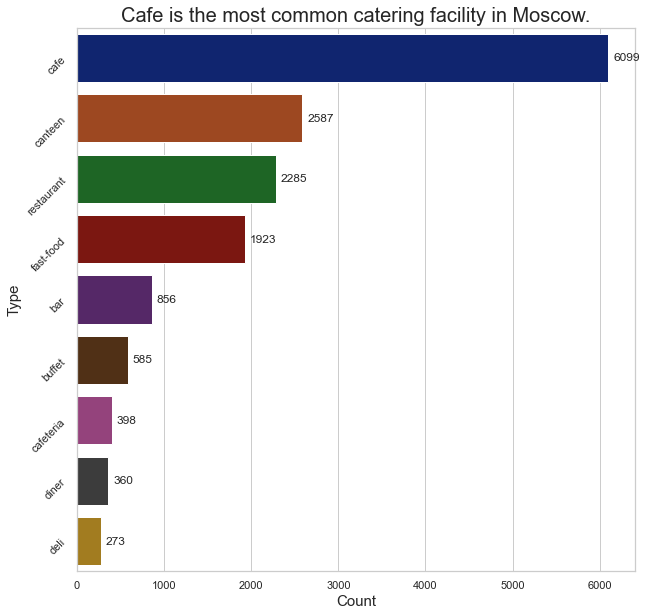

In [130]:
# catering facilities type distribution
splot = sns.barplot(y=data_type.index, x='id', data=data_type)
plt.title('Cafe is the most common catering facility in Moscow.', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Type', fontsize=15)
plt.yticks(rotation=45)
for p in splot.patches:
    splot.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show();

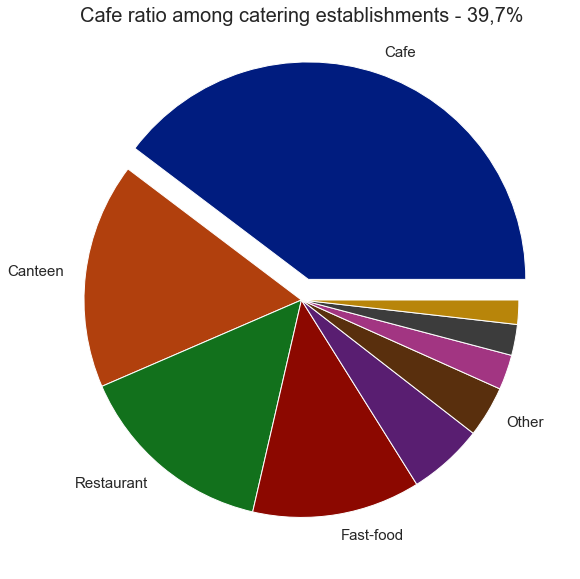

In [65]:
# pie chart
plt.pie(data_type['ratio'], explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0], 
        labels=['Cafe', 'Canteen', 'Restaurant', 'Fast-food', '', 'Other', '', '', ''], textprops={'fontsize':15})
plt.title('Cafe ratio among catering facilities - 39,7%', fontsize=20);

In [66]:
# calculate the average number of seats per type
data_numbers = data.pivot_table(index='object_type', values='number', aggfunc='mean').sort_values(by='number', ascending=False)
data_numbers['number'] = data_numbers['number'].astype('int64')
data_numbers

,number
object_type,
canteen,130
restaurant,96
buffet,51
bar,43
cafe,39
fast-food,20
cafeteria,9
diner,7
deli,5


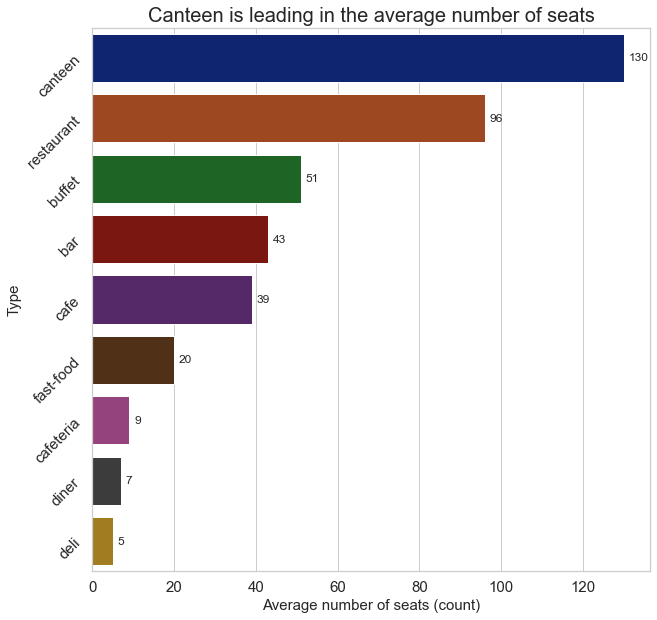

In [81]:
# average seating number barplot
splot = sns.barplot(y=data_numbers.index, x='number', data=data_numbers)
plt.title('Canteen is leading in the average number of seats', fontsize=20)
plt.xlabel('Average number of seats (count)', fontsize=15)
plt.ylabel('Type', fontsize=15)
plt.tick_params(labelsize=15)
plt.yticks(rotation=45)
for p in splot.patches:
    splot.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show();

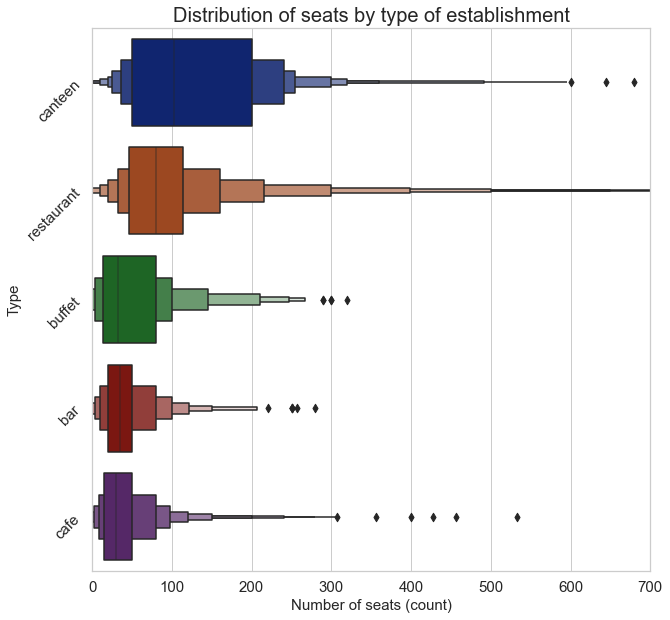

In [76]:
# график распределения посадочных мест по типу заведения
sns.boxenplot(x="number", y="object_type", data=data, order=['canteen', 'restaurant', 'buffet', 'bar', 'cafe'])
plt.title('Distribution of seats by type of catering facility', fontsize=20)
plt.xlabel('Number of seats (count)', fontsize=15)
plt.xlim(0, 700)
plt.ylabel('Type', fontsize=15)
plt.tick_params(labelsize=15)
plt.yticks(rotation=45);

## Interim conclusions

- cafe is the most common catering facility, accounting for nearly 40% of all facilities;
- with values of 16.8%, 14.9% and 12.5%, cafes are followed by canteens, restaurants and fast-food catering facilities;
- the remaining objects make up 16%;
----
- canteen is at the top of the average number of seats (130), followed by the restaurants and buffets (96 and 51 respectively);
- bars and cafes are around the same range - 39 and 43 places respectively.

## Chain and "no-chain" catering facilities

In this section we'll split all records into two subsets and will analyze them separately.

In [78]:
# chain and 'no-chain' ratio
data_chain = data.pivot_table(index='chain', values='id', aggfunc='count').sort_values(by='id', ascending=False)
data_chain['ratio'] = round((data_chain['id']/data_chain['id'].sum()*100), 1)
data_chain

,id,ratio
chain,,
0,12398,80.70
1,2968,19.30


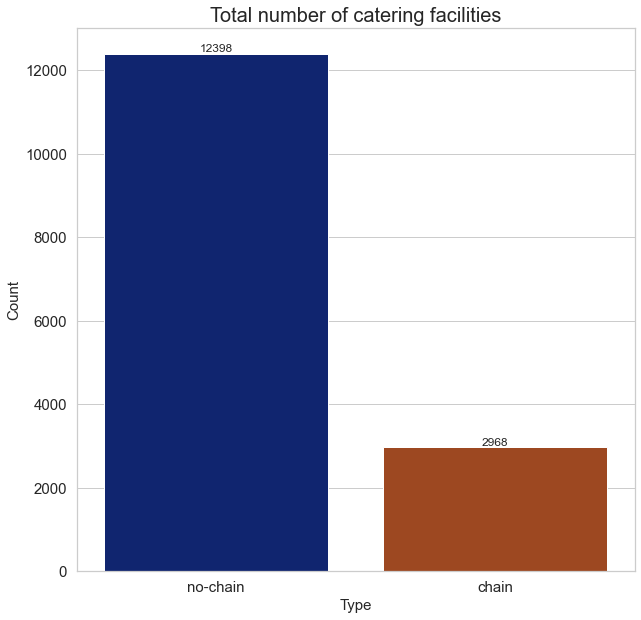

In [131]:
# graphical representation (barplot)
splot = sns.barplot(x=data_chain.index, y='id', data=data_chain)
plt.title('Total number of catering facilities', fontsize=20)
plt.xlabel('Type', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks([0, 1], ['no-chain', 'chain'])
plt.tick_params(labelsize=15)
rects = splot.patches
labels = list(data_chain['id'])
for rect, label in zip(rects, labels):
    height = rect.get_height()
    splot.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )
plt.show();

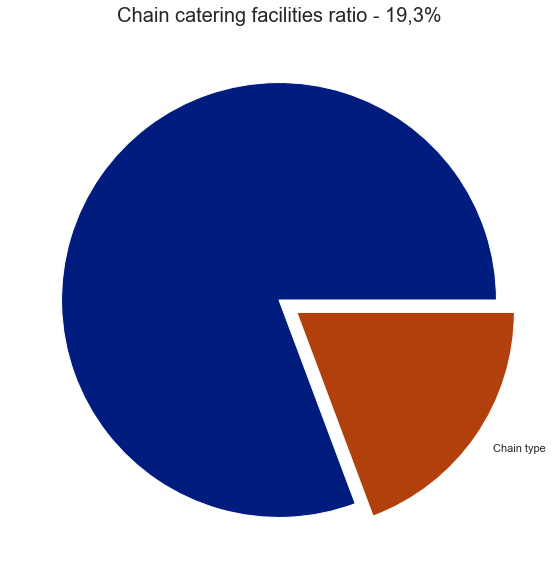

In [132]:
# pie chart
plt.pie(data_chain['ratio'], labels=[' ', 'Chain type'], explode=[0, 0.1])
plt.title('Chain catering facilities ratio - 19,3%', fontsize=20);

In [85]:
# select chain catering facilities in a separate variable
chain = data.query('chain == 1')

In [86]:
# type statitistics
data_chain_type = chain.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id', ascending=False)
data_chain_type

,id
object_type,
cafe,1396
fast-food,791
restaurant,544
deli,78
diner,56
cafeteria,52
bar,37
buffet,11
canteen,3


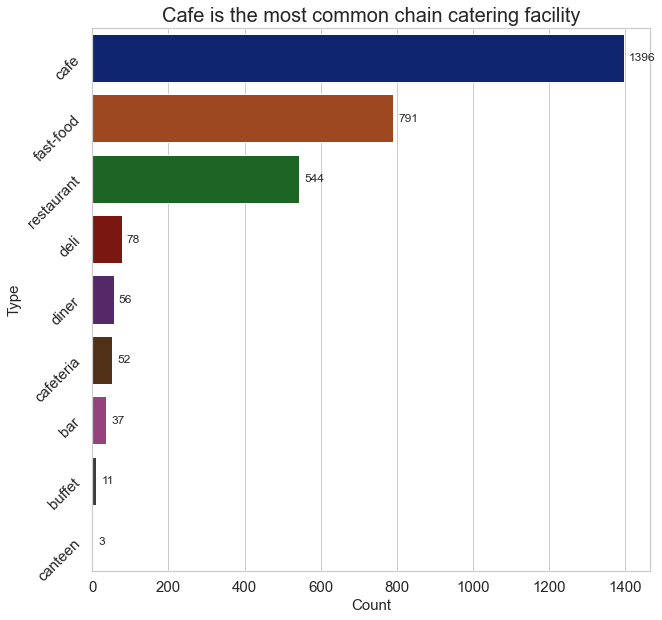

In [133]:
# graphical representation
splot = sns.barplot(y=data_chain_type.index, x='id', data=data_chain_type)
plt.title('Cafe is the most common chain catering facility', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Type', fontsize=15)
plt.yticks(rotation=45)
plt.tick_params(labelsize=15)
for p in splot.patches:
    splot.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show();

In order to find out which categories of catering facilities have chain type, we'll calculate the "chain ratio" for each category, construct a table and a graph.

In [95]:
# number of catering facilities for each category
data_type_sorted = data_type.sort_index().drop('ratio', axis=1)
data_type_sorted

,id
object_type,
bar,856
buffet,585
cafe,6099
cafeteria,398
canteen,2587
deli,273
diner,360
fast-food,1923
restaurant,2285


In [96]:
# number of chain catering facilities for each category
data_chain_type_sorted = data_chain_type.sort_index()
data_chain_type_sorted

,id
object_type,
bar,37
buffet,11
cafe,1396
cafeteria,52
canteen,3
deli,78
diner,56
fast-food,791
restaurant,544


In [99]:
# chain ratio for each category
share = pd.DataFrame(round((data_chain_type_sorted['id']/data_type_sorted['id']*100), 1))
share.rename({'id':'ratio'}, axis=1, inplace=True)
share = share.sort_values('ratio', ascending=False)
share.style.background_gradient('coolwarm')

,ratio
object_type,
fast-food,41.100000
deli,28.600000
restaurant,23.800000
cafe,22.900000
diner,15.600000
cafeteria,13.100000
bar,4.300000
buffet,1.900000
canteen,0.100000


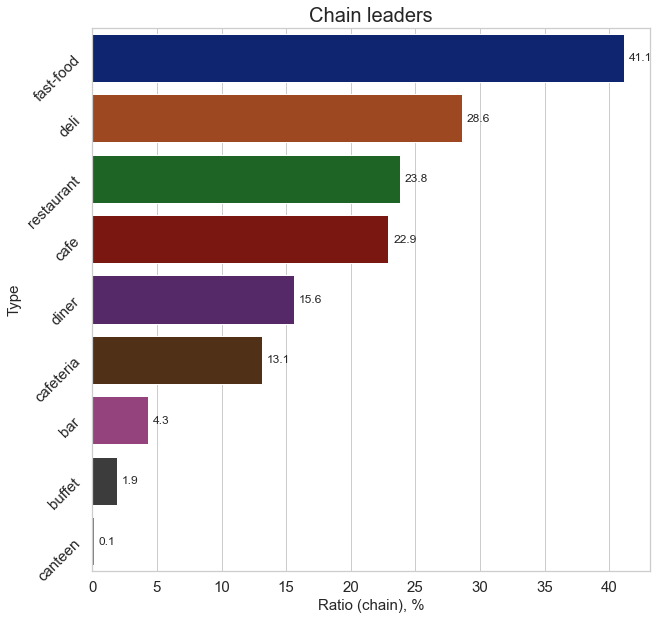

In [101]:
# graphical representation
splot = sns.barplot(y=share.index, x='ratio', data=share)
plt.title('Chain leaders', fontsize=20)
plt.xlabel('Ratio (chain), %', fontsize=15)
plt.ylabel('Type', fontsize=15)
plt.yticks(rotation=45)
plt.tick_params(labelsize=15)
for p in splot.patches:
    splot.annotate("%.1f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show();

In [102]:
# pivot table for median seating number (chain catering facilities)
chain_number = chain.pivot_table(index='object_name', values='number', aggfunc=['count', 'median'])
chain_number.columns = ['objects', 'median']
chain_number

,objects,median
object_name,,
beverly hills diner,1,88.00
bierloga,1,75.00
black & white,1,40.00
bocconcino,3,68.00
boobo,1,46.00
...,...,...
якитория и ян примус,1,282.00
ямми микс,1,2.00
ян примус,1,300.00


Based on the pivot  table, some catering facilities have only one object in their chain. There are a number of reasons for this:

- franchise allows a slightly change in the name of the catering facility for each owner;
- it could be a regional (or global) chain that has in Moscow only one catering facility;

Let’s see the number of chain catering facilities with one object:

In [105]:
# number of chain catering facilities with one object, ratio
round(chain_number.query('objects == 1', engine='python').shape[0]/chain_number.shape[0] * 100, 2)

57.37

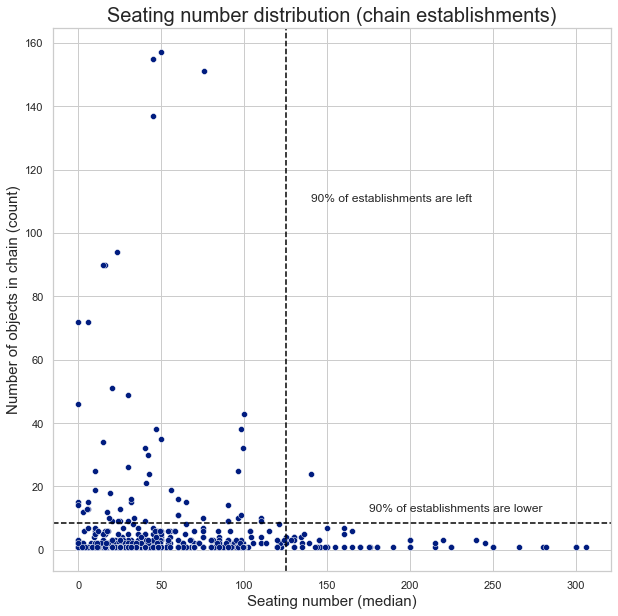

In [107]:
# scatterplot
sns.scatterplot(data=chain_number, y='objects', x='median')
plt.title('Seating number distribution (chain catering facilities)', fontsize=20)
plt.xlabel('Seating number (median)', fontsize=15)
plt.ylabel('Number of objects in chain (count)', fontsize=15)
plt.axhline(np.percentile(chain_number['objects'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(chain_number['median'], 90), linestyle='--', color='black')
plt.text(175,12, '90% of catering facilities are lower')
plt.text(140,110, '90% of catering facilities are left');

## Interim conclusions

- chain catering facilities make up 19.3% of the total;
- among them, the leader is fast food (41%), followed by deli, restaurants, cafes (approx. 25-30% for each category);
- analysis of the median number of seats showed that 90% have fewer than 130 seats and that the big food chains (over 20 objects) rarely have more than 50 seats;
- 90% of the catering facilities have less than 10 objects in their chain, and 57.3% - only one object in Moscow.

## Geographical characteristic of the catering facilities

In this section, we will analyse the following points:

- streets with the lowest/highest number of food services;
- the most popular districts;
- number of seats in popular districts;
- districts and streets with one catering facility.

In [108]:
# top-10 streets and corresponding districts by the number of catering facilities
top_10 = (data
          .pivot_table(index=['street', 'area'], values='id', aggfunc='count')
          .sort_values(by='id', ascending=False).head(10))
top_10

,,id
street,area,
проспект мира,мещанский район,204
профсоюзная улица,академический район,183
ленинградский проспект,район аэропорт,173
пресненская набережная,пресненский район,167
варшавское шоссе,донской район,165
ленинский проспект,район якиманка,148
проспект вернадского,район проспект вернадского,132
кутузовский проспект,район дорогомилово,114
каширское шоссе,район москворечье-сабурово,112


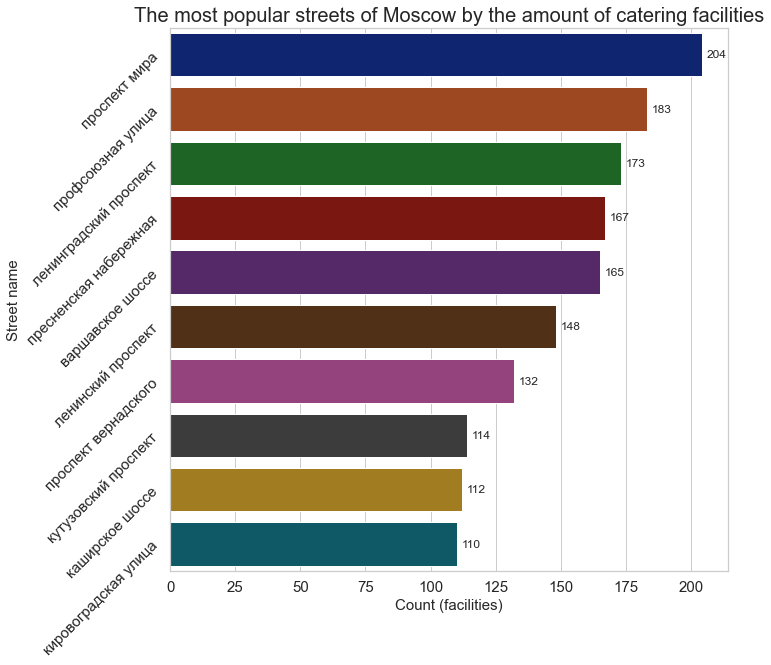

In [114]:
# the most popular streets and number of catering facilities
splot = sns.barplot(y=top_10.index.get_level_values(0), x='id', data=top_10)
plt.title('The most popular streets by the number of catering facilities', fontsize=20)
plt.xlabel('Count (facilities)', fontsize=15)
plt.ylabel('Street name', fontsize=15)
plt.yticks(rotation=45)
plt.tick_params(labelsize=15)
for p in splot.patches:
    splot.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show();

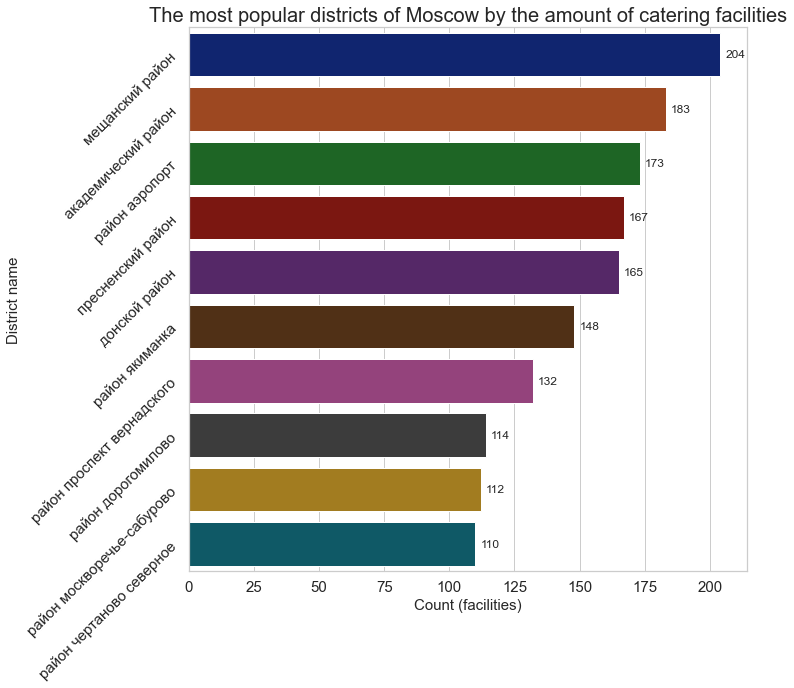

In [113]:
# the most popular districts and number of catering facilities
splot = sns.barplot(y=top_10.index.get_level_values(1), x='id', data=top_10)
plt.title('The most popular districts by the number of catering facilities', fontsize=20)
plt.xlabel('Count (facilities)', fontsize=15)
plt.ylabel('District name', fontsize=15)
plt.yticks(rotation=45)
plt.tick_params(labelsize=15)
for p in splot.patches:
    splot.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show();

In [115]:
# the street and district grouping as a separate variable
streets = data.pivot_table(index=['street', 'area'], values='id', aggfunc='count')

In [116]:
# number of streets and associated districts with one catering facility
street_1 = streets.query('id == 1')
street_1.shape[0]

523

In [117]:
# districts with the largest number of streets with one catering facility
top_street_1 = (street_1
                .pivot_table(index='area', values='id', aggfunc='count')
                .sort_values(by='id', ascending=False).head(10))
top_street_1

,id
area,
таганский район,26
басманный район,25
район хамовники,22
тверской район,19
район арбат,18
пресненский район,16
район марьина роща,16
район сокольники,15
мещанский район,14


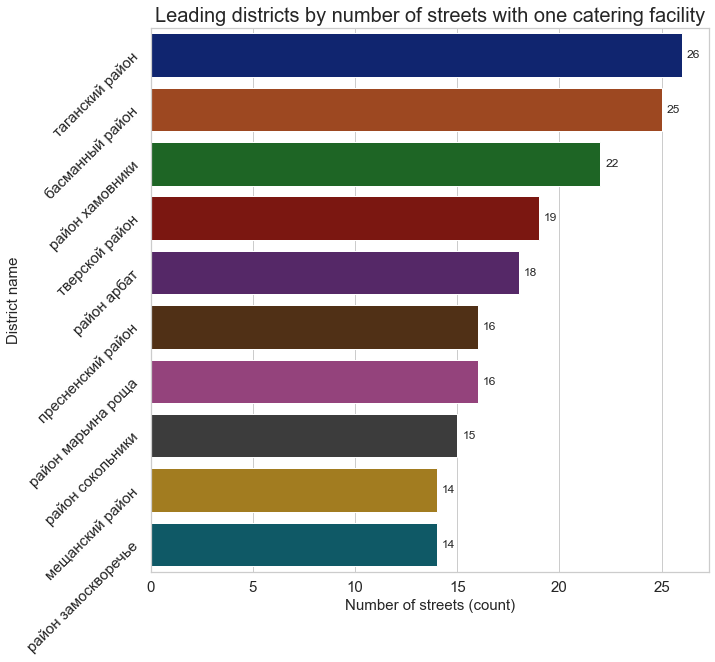

In [120]:
# visualization
splot = sns.barplot(y=top_street_1.index, x='id', data=top_street_1)
plt.title('Leading districts by number of streets with one catering facility', fontsize=20)
plt.xlabel('Number of streets (count)', fontsize=15)
plt.ylabel('District name', fontsize=15)
plt.tick_params(labelsize=15)
plt.yticks(rotation=45)
for p in splot.patches:
    splot.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show();

In [121]:
# list of the most popular streets 
top_street_names = list(top_10.index.get_level_values(0))

In [122]:
# list of the streets with one catering facility
one_street_names = list(street_1.index.get_level_values(0))

In [123]:
# catering facilities that belong to the most popular streets
data_top_10 = data[data['street'].isin(top_street_names)]

In [124]:
# the only catering facilities in the street
data_one_rest = data[data['street'].isin(one_street_names)]

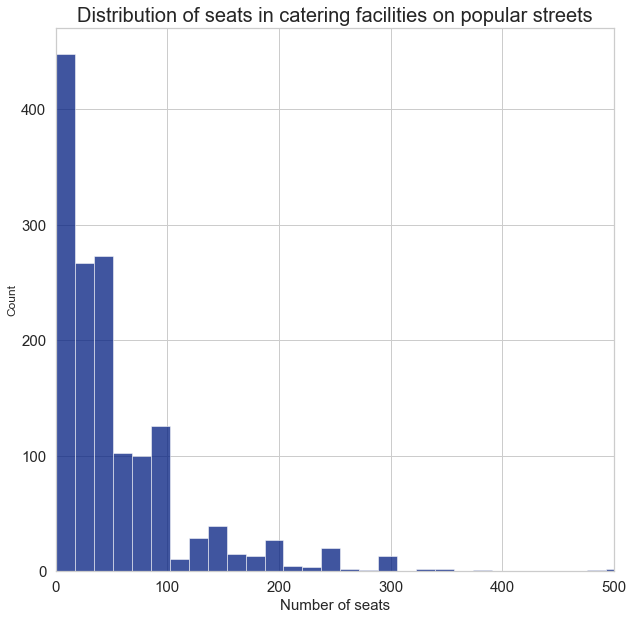

In [126]:
# distribution of seats number on popular streets
splot = sns.histplot(data_top_10['number'], bins=100)
plt.title('Distribution of seats in catering facilities on popular streets', fontsize=20)
plt.xlabel('Number of seats', fontsize=15)
plt.xlim(0, 500)
plt.tick_params(labelsize=15)
plt.show();

In [128]:
# the average seats number on popular streets
round(data_top_10['number'].mean(), 2)

57.97

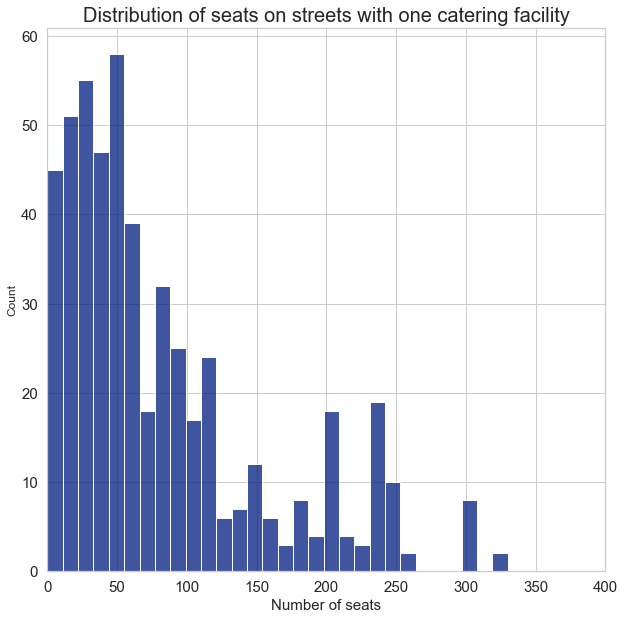

In [129]:
# distribution of seats number on streets with one catering facility
splot = sns.histplot(data_one_rest['number'], bins=30)
plt.title('Distribution of seats on streets with one catering facility', fontsize=20)
plt.xlabel('Number of seats', fontsize=15)
plt.tick_params(labelsize=15)
plt.xlim(0, 400)
plt.show();

In [135]:
# the average seats number on streets with one catering facility
round(data_one_rest['number'].mean(), 2)

82.5

In [136]:
# grouping of catering facilities that are the alone on their street by type
data_one_rest_type = data_one_rest.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id', ascending=False)
data_one_rest_type

,id
object_type,
canteen,217
cafe,147
buffet,58
restaurant,49
bar,21
fast-food,15
diner,7
deli,6
cafeteria,3


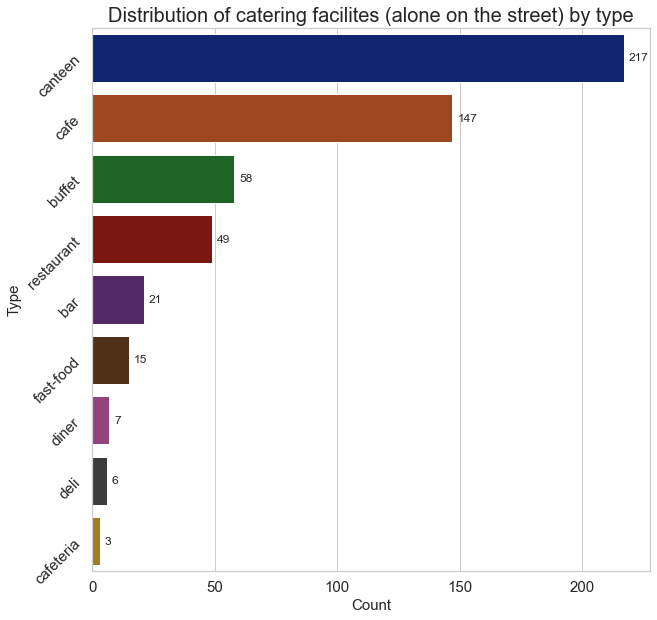

In [138]:
# types distribution
splot = sns.barplot(y=data_one_rest_type.index, x='id', data=data_one_rest_type)
plt.title('Distribution of catering facilities (alone on the street) by type', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Type', fontsize=15)
plt.yticks(rotation=45)
plt.tick_params(labelsize=15)
for p in splot.patches:
    splot.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show();

In [139]:
# grouping of catering facilities on popular streets
data_top_10_type = data_top_10.pivot_table(index='object_type', values='id', aggfunc='count').sort_values(by='id', ascending=False)
data_top_10_type

,id
object_type,
cafe,635
restaurant,291
fast-food,258
canteen,139
bar,63
cafeteria,48
buffet,33
deli,24
diner,17


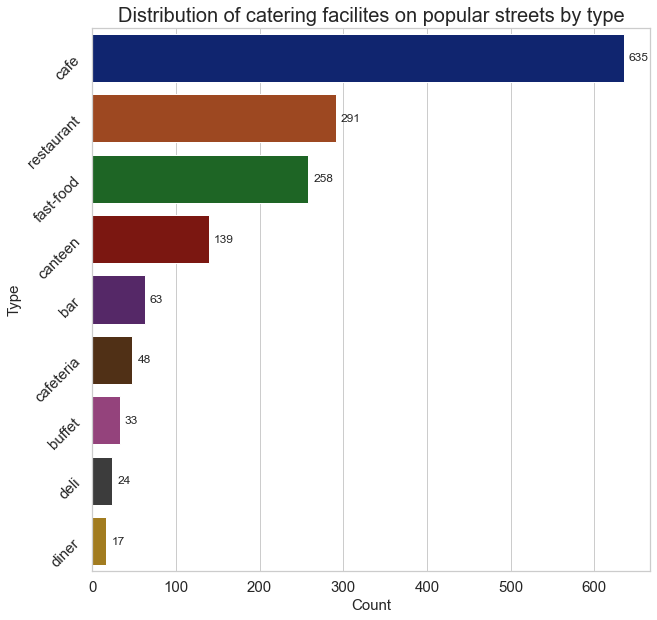

In [140]:
# types distribution
splot = sns.barplot(y=data_top_10_type.index, x='id', data=data_top_10_type)
plt.title('Distribution of catering facilities on popular streets by type', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Type', fontsize=15)
plt.yticks(rotation=45)
plt.tick_params(labelsize=15)
for p in splot.patches:
    splot.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
plt.show();

## Interim conclusions

It is expected that the most popular streets will be the longest - they diverge radially from the downtown.  An exception among them is the Presnenskaya embankment, which also has a large number of establishments (4th place and 167 objects). Accordingly, the most popular districts are located radially around the downtown.    
Districts with the largest number of streets with one catering facility are located in the center too (except Sokolniki district - takes 8th place and 15 streets). This can be explained by the location on small, short streets and alleys.     
We've found that on large avenues the average number of seats is slightly lower than on the streets with one catering facility (58 vs.82). It makes sense that the establishment, alone on the street, should have a lot of seats. Also an important role in this case can play the establishment area, and therefore the rent, which is most likely higher in the downtown.    
When analyzing the catering facilities, alone on the street, we've found out that the first three are occupied by canteens (217pcs.), cafes (147pcs.) and buffets (58pcs.)   

Information on the number of competitors at a certain distance as well as morning/afternoon/evening street passability would be useful for a more comprehensive analysis of the geographic situation.


# General conclusion

<div style="border:solid green 2px; padding: 20px">
    
In this project, we analysed the catering market in Moscow with a view to attracting investors for the new project: open a small cafe with an original serving - the visitors will be served by robot waiters.    
Research data originate from open sources.  
The analysis was performed on all catering facilities, as well as for subsets: we've split dataset into chain and no-chain objects, as well as catering facilities on popular streets and the alone on the street.          
    
**The main points in data preprocessing:**
* data type change: `chain` column (object to int64);
* for the text data - converting to a lowercase;
* duplicates removal from the street - district dataframe (after removal one street corresponds to only one district);
* merging original table with the street\district table;
* calculated fields was added - extracting the street name and corresponding district in separate columns, lemmatization of the `address` column;

**Comments** 
* one street corresponds to multiple districts (processed this feature, after processing one street corresponds to only one district);
* zeros in the `number `column usually correspond to fast-food and takeaway facilities, large numbers in this column correspond to  restaurant complexes;
* there are incomplete duplicates in the names of the catering facilities that should be unique, for some establishments an incorrect name was indicated;
* by extracting the street name in the address between the "Moscow" and the street name can be found small towns (Zelenograd), and villages names that also belong to Moscow.

**Types of the catering facilities:**
* Moscow’s most common catering facility is cafe (40% of total, 6,099 objects);
* the share of canteens, restaurants and fast food is almost equal (about 15% per type);
* share of other types - no greater than than 16% overall;
* the leader in the average number of seats is canteen (130), followed by restaurant and buffet (96 and 51, respectively);
* bars and cafes hold an average of 39 and 43 seats;

**Chain and "no-chain" catering facilities:**
- chain catering facilities make up 19.3% of the total;
- the leader is fast food (41%), followed by deli, restaurants, cafes (approx. 25-30%  for each category);
- 90% of chain establishments have less than 130 seats, and the big food chains (over 20 objects) rarely have more than 50 seats;
- 90% of catering facilities have less than 10 objects in their chain;
- 57.3% of chain catering facilities have only one objects in Moscow;

**Geographical characteristic of the catering facilities:**
*  the most popular streets are the longest - they diverge radially from the downtown (exception is the Presnenskaya embankment, 4th place and 167 objects);
* accordingly, the most popular districts are located radially around the downtown;
* districts with the largest number of streets with one catering facility are located in the center too (except Sokolniki district - 8th place and 15 streets).
* on large avenues the average number of seats is slightly lower than on the streets with one catering facility (58 vs.82);
    
**Recommendations:**
    
The goal of our project was to seek investors for a small cafe in Moscow with the original concept - clients should be served by robots. According to the request, we are not suitable for the types of facilities that use a self-serve system - buffets, fast food restaurants, deli, canteens, as well as facilities with a large number of seats (eg, canteen) due to the cost of the project.

The most suitable type is a cafe with about 43 seats. It may become a chain establishment if the project is successful. Cafe is also the most common facility in Moscow. It may also be a bar with about 39 seats. An alternative may be a small restaurant with the number of seats half the average of the city (96\2). In this case, it is necessary to consider the fact that in the restaurant, as a rule, the menu should be more varied (resulting in increased costs).

As for the location of the future project, we didn't have information on morning/day/evening street passability, as well as the number of nearest competitors. Therefore, the best option for opening will be considered any district within the Third Ring Road on the street that does not have food and beverage facilities. The number of seats can be half the average for such objects (82\2). As an alternative to a cheaper option, can be a longer distance from the center but a location on a major street/ avenue. Type of establishment - cafe, looks advantageous in both options, and in the case of location closer to the center, the restaurant can be recommended, as a less represented type (of suitable) in this area.